In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
#xs = np.array([0., 2.67, 5.33, 8., 10.67, 13.33, 16., 18.67, 21.33, 24.])
#ys = 13 + 3*np.sin((np.pi/12)*xs - 0.5*np.pi - 0.7) + np.random.normal(scale=0.35, size=len(xs))
print(ys)

[11.02009692  9.75446417 10.85681075 12.20683728 14.21325614 15.39737946
 15.92441522 14.63696274 12.14172256 10.43248343]


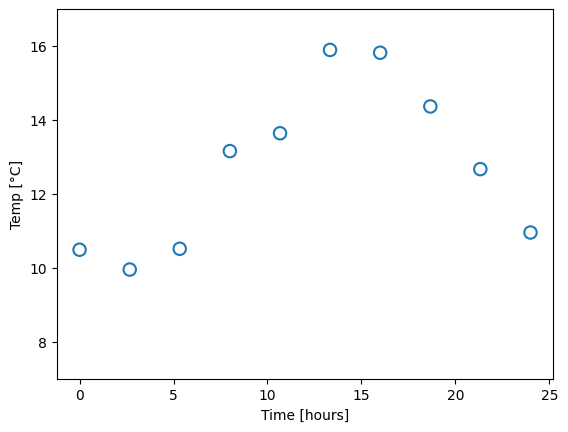

In [56]:
#| label: fig-simple-measurements
#| fig-cap: Temperature measurements over the course of 24 hours. 

xs = np.array([0., 2.67, 5.33, 8., 10.67, 13.33, 16., 18.67, 21.33, 24.])
ys = np.array([10.49007708, 9.95383366, 10.51591666, 13.15859659, 13.6407803, 15.89547831, 15.82021445, 14.36672616, 12.67044056, 10.95573422])

plt.scatter(xs, ys, marker='o', s=80, facecolors='none', edgecolors='tab:blue', linewidths=1.5)
plt.ylim((7, 17))
plt.xlabel('Time [hours]')
plt.ylabel('Temp [°C]')
plt.show()

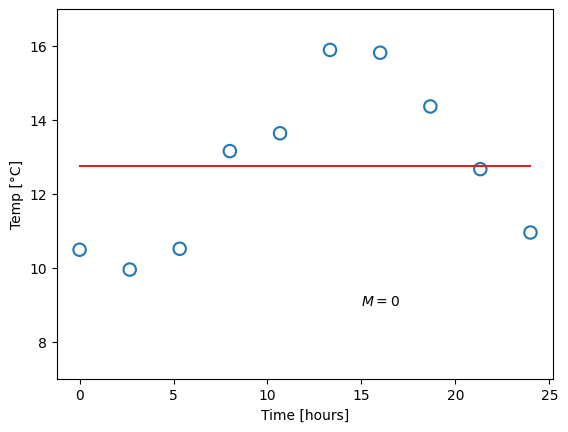

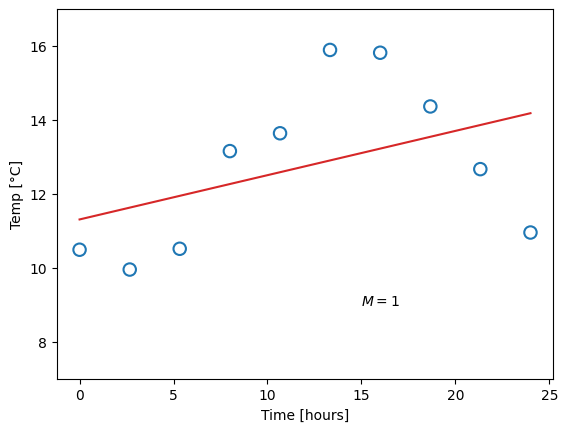

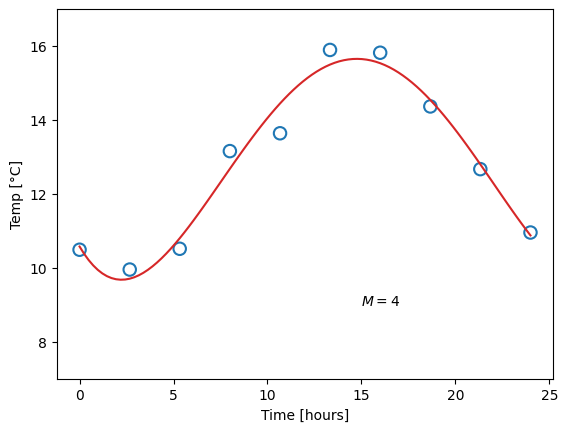

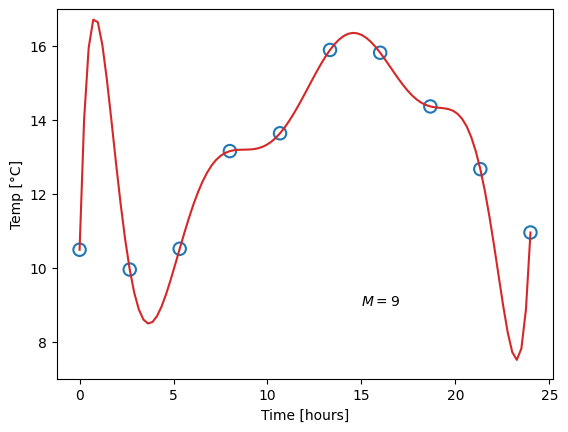

In [37]:
#| label: fig-polynomial-fit
#| fig-cap: Fitting polymonials (red lines) of different orders to the set of measurements (blue circles).
#| fig-subcap: 
#|   - "Zeroth-order polymonial"
#|   - "First-order polymonial"
#|   - "Fourth-order polymonial"
#|   - "Ninth-order polymonial"
#| layout-nrow: 2
#| layout-ncol: 2

def create_plot(polyn_order):
    plt.scatter(xs, ys, marker='o', s=80, facecolors='none', edgecolors='tab:blue', linewidths=1.5)
    poly = np.polynomial.Polynomial.fit(xs, ys, deg=polyn_order, domain=(xs[0], xs[-1]))
    xf, yf = poly.linspace()
    plt.plot(xf, yf, color='tab:red')
    plt.ylim((7, 17))
    plt.xlabel('Time [hours]')
    plt.ylabel('Temp [°C]')
    plt.text(15, 9, "$M = {}$".format(polyn_order))
    plt.show()

for m in [0, 1, 4, 9]:
    create_plot(m)

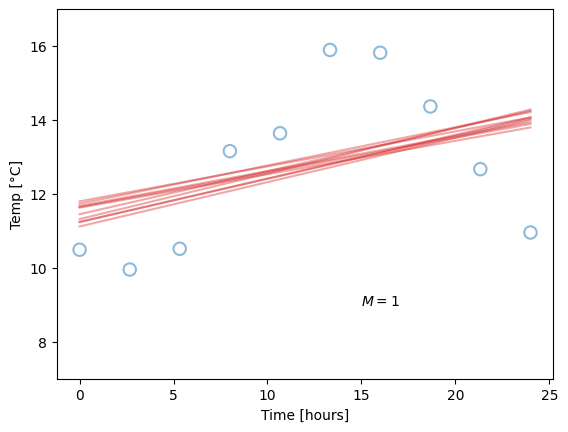

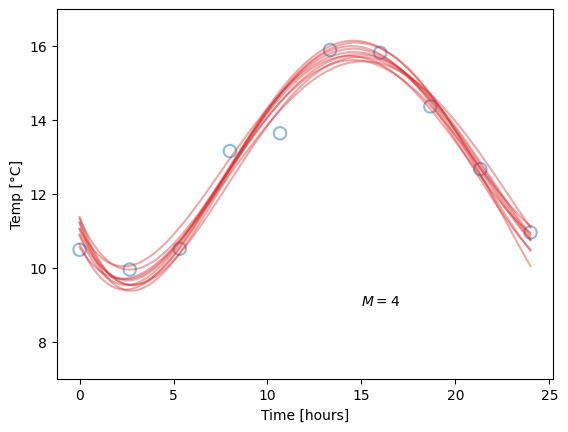

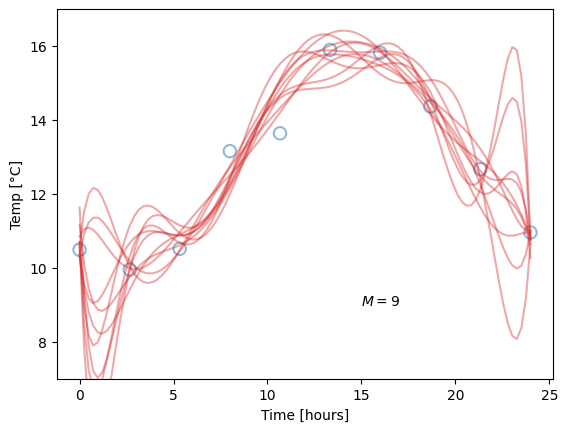

In [67]:
#| label: fig-bias-variance-tradeoff
#| fig-cap: "Red lines: Different models fitted to separate datasets, where each dataset is drawn from the same distribution as the original one. The original dataset shown in blue circles."
#| fig-subcap: 
#|   - "Large bias, low variance"
#|   - "Resonably low bias and variance"
#|   - "Low bias, large variance"
#| layout-ncol: 3

def create_test_plot(polyn_order):
    plt.scatter(xs, ys, marker='o', s=80, facecolors='none', edgecolors='tab:blue', linewidths=1.5, alpha=0.5)
    
    for i in range(10):
        # Create new random data, fit a model
        #xs_new = np.random.uniform(0, 24, size=24)
        ys_new = 13 + 3*np.sin((np.pi/12)*xs - 0.5*np.pi - 0.7) + np.random.normal(scale=0.35, size=len(xs))
        poly = np.polynomial.Polynomial.fit(xs, ys_new, deg=polyn_order, domain=(xs[0], xs[-1]))
        #plt.scatter(xs_test, ys_test, marker='o', s=80, facecolors='none', edgecolors='tab:red', linewidths=1.5)
        xf, yf = poly.linspace()
        plt.plot(xf, yf, color='tab:red', alpha=0.4)
    plt.ylim((7, 17))
    plt.xlabel('Time [hours]')
    plt.ylabel('Temp [°C]')
    plt.text(15, 9, "$M = {}$".format(polyn_order))
    plt.show()

for m in [1, 4, 9]:
    create_test_plot(m)